In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [11]:
raw_data = pd.read_csv('Ecommerce Customers')

In [12]:
df=raw_data.copy()

In [13]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [16]:
df.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


In [18]:
df['Avatar'].nunique()

138

C:\Users\mathe\AppData\Local\Temp\ipykernel_14556\429359120.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yearly Amount Spent'])
C:\Users\mathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

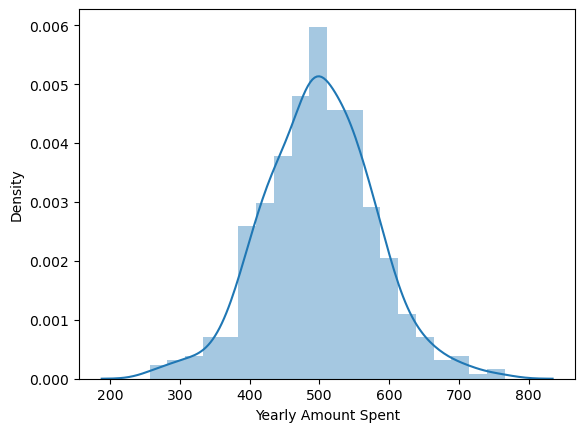

In [20]:

sns.distplot(df['Yearly Amount Spent'])

C:\Users\mathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

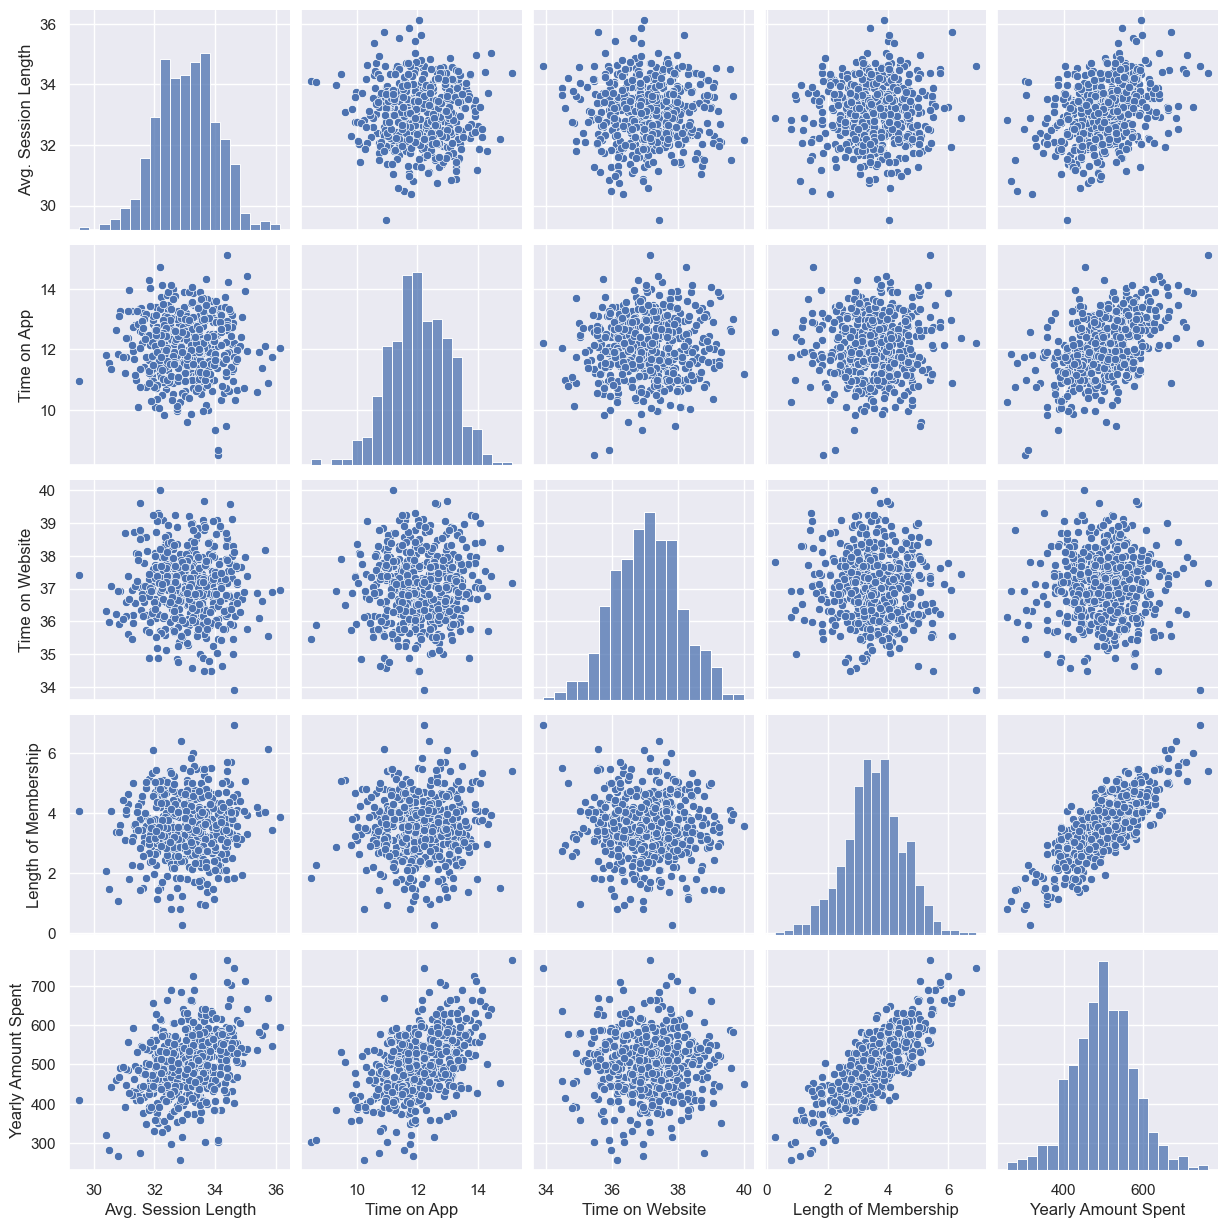

In [26]:
sns.set()
sns.pairplot(df)

In [23]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [27]:
variables = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [30]:
vif = pd.DataFrame( {'VIF':[variance_inflation_factor(variables,i) for i in range(variables.shape[1])],'Features':variables.columns.values} )
vif

,VIF,Features
0,613.185924,Avg. Session Length
1,144.019714,Time on App
2,658.495572,Time on Website
3,13.578801,Length of Membership


In [32]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [33]:
regression_data = df[['Yearly Amount Spent','Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [34]:
target = regression_data['Yearly Amount Spent']

In [36]:
input_var = regression_data.drop('Yearly Amount Spent',axis=1)

In [37]:
s = StandardScaler()

In [38]:
s.fit(input_var)

StandardScaler()

In [39]:
scaled_input = s.transform(input_var)

In [40]:
#train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(scaled_input,target,test_size=0.2,random_state=42)

In [45]:
l = LinearRegression()

In [46]:
l.fit(x_train,y_train)

LinearRegression()

In [50]:
summary = pd.DataFrame({'Features':input_var.columns.values, 'Coefficients':l.coef_,'Pvalues':f_regression(x_train,y_train)[1].round(3)})
summary

,Features,Coefficients,Pvalues
0,Avg. Session Length,25.380484,0.000
1,Time on App,38.522416,0.000
2,Time on Website,0.313328,0.847
3,Length of Membership,61.790225,0.000


In [52]:
train_prediction = l.predict(x_train)

In [60]:
train_df = pd.DataFrame({'train_prediction':train_prediction,'actual_value_train':y_train})
train_df

,train_prediction,actual_value_train
249,519.048685,518.786483
433,434.014779,434.144202
19,596.354942,605.061039
322,487.606795,478.262126
332,406.672954,424.202827
...,...,...
106,500.406572,494.551861
270,543.450683,540.995739
348,396.760754,392.810345
435,573.978179,571.216005


C:\Users\mathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


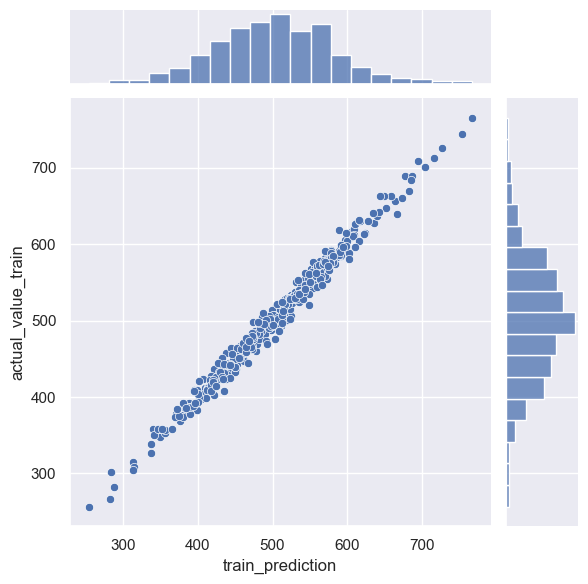

In [61]:
sns.jointplot(data=train_df,x='train_prediction',y='actual_value_train')

In [51]:
test_prediction = l.predict(x_test)

In [62]:
test_df = pd.DataFrame({'test_predition':test_prediction,'actual_value_test':y_test})
test_df

,test_predition,actual_value_test
361,402.862301,401.033135
73,542.533257,534.777188
374,426.620119,418.602742
155,501.913864,503.978379
104,409.666655,410.069611
...,...,...
347,588.328629,593.156401
86,485.181373,487.379306
75,455.930701,478.719357
438,398.678207,392.992256


In [64]:
test_df['Residuals'] = test_df['actual_value_test'] -  test_df['test_predition']

In [71]:
test_df['Diffrence'] = abs (test_df['Residuals'] / test_df['actual_value_test'] * 100)

In [72]:
test_df 

,test_predition,actual_value_test,Residuals,Diffrence
0,402.862301,401.033135,-1.829165,0.456113
1,542.533257,534.777188,-7.756069,1.450337
2,426.620119,418.602742,-8.017377,1.915271
3,501.913864,503.978379,2.064515,0.409644
4,409.666655,410.069611,0.402956,0.098265
...,...,...,...,...
95,588.328629,593.156401,4.827772,0.813912
96,485.181373,487.379306,2.197933,0.450970
97,455.930701,478.719357,22.788656,4.760337
98,398.678207,392.992256,-5.685951,1.446835


In [89]:
sum(test_df['Diffrence'])

179.13022716737706

C:\Users\mathe\AppData\Local\Temp\ipykernel_14556\1412905160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df['Residuals'],bins=50)
C:\Users\mathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Residuals', ylabel='Density'>

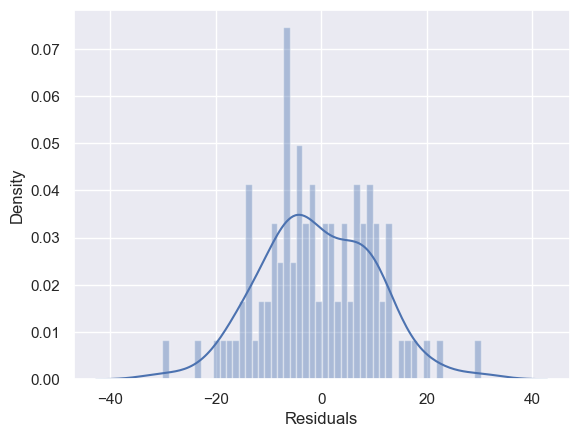

In [77]:
sns.distplot(test_df['Residuals'],bins=50)

In [75]:
np.sqrt(metrics.mean_squared_error(test_prediction,y_test))

10.48159058463648

In [78]:
coefficints =l.coef_

In [79]:
pd.DataFrame(data=coefficints,columns=['coefficints'])

,coefficints
0,25.380484
1,38.522416
2,0.313328
3,61.790225


In [80]:
input_variable = input_var.drop('Time on Website',axis=1)

In [81]:
ll = LinearRegression()

In [82]:
xtrain,xtest,ytrain,ytest = train_test_split( input_variable,target,random_state=42,test_size=0.2)

In [83]:
ll.fit(xtrain,ytrain)

LinearRegression()

In [85]:
no_test_prediction = ll.predict(xtest)

In [87]:
np.sqrt(metrics.mean_squared_error(no_test_prediction,y_test))

10.503470182649455

In [90]:
no_df = pd.DataFrame({'no_prediction':no_test_prediction,'actual_value':y_test})
no_df

,no_prediction,actual_value
361,402.188872,401.033135
73,542.544723,534.777188
374,426.237748,418.602742
155,501.889791,503.978379
104,409.309367,410.069611
...,...,...
347,588.035917,593.156401
86,485.167961,487.379306
75,455.408216,478.719357
438,398.574213,392.992256


In [92]:
no_df['Residuals'] = no_df['actual_value'] -  no_df['no_prediction']

In [93]:
no_df['Diffrence'] = np.absolute(no_df['Residuals'] / no_df['actual_value'] * 100)

In [94]:
no_df

,no_prediction,actual_value,Diffrence,Residuals
361,402.188872,401.033135,0.288190,-1.155737
73,542.544723,534.777188,1.452481,-7.767535
374,426.237748,418.602742,1.823926,-7.635005
155,501.889791,503.978379,0.414420,2.088588
104,409.309367,410.069611,0.185394,0.760245
...,...,...,...,...
347,588.035917,593.156401,0.863260,5.120484
86,485.167961,487.379306,0.453722,2.211345
75,455.408216,478.719357,4.869479,23.311141
438,398.574213,392.992256,1.420373,-5.581957


In [95]:
sum(no_df['Diffrence'])

179.62578016503852

In [99]:
ll.score(xtrain,ytrain)

0.9854090539296939